# Reinforcement learning for Easy21

In [66]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def new_card():
    value = int(random() * 10) + 1
    if random() < (2/3):
        return value
    else:
        return -value

In [22]:
def step(dealer_card, player_sum, action):
    if action == "hit":
        player_sum += new_card()
        if (player_sum < 1 or player_sum > 21):
            return (-1, -1, -1)
        else:
            return (dealer_card, player_sum, 0)
    if action == "stick":
        while dealer_card <= 17:
            dealer_card += new_card()
            if (dealer_card < 0 or dealer_card > 21):
                return (-1, -1, 1)
        if player_sum > dealer_card:
            return (-1, -1, 1)
        if player_sum == dealer_card:
            return (-1, -1, 0)
        return (-1, -1, -1)
    print("Unknown action.")

## Monte Carlo learning

In [31]:
def initiate_q_mc():
    return np.zeros((10, 21, 2))

def e_greedy(dealer_card, player_sum, q_mc, e):
    if random() < e or q_mc[dealer_card, player_sum, 0] == q_mc[dealer_card, player_sum, 0]:
        if random() < 0.5:
            return "stick"
        else:
            return "hit"
    if q_mc[dealer_card, player_sum, 0] > q_mc[dealer_card, player_sum, 1]:
        return "stick"
    else:
        return "hit"

def train_mc(episodes):
    n0 = 100
    
    q_mc = initiate_q_mc()
    visited_action = np.zeros((10, 21, 2))
    
    for i in range(episodes):        
        dealer_card = abs(new_card())
        player_sum = abs(new_card())
        
        history = []
        
        while dealer_card != -1:
            e = n0 / (n0 + np.sum(visited_action, axis = 2)[dealer_card - 1, player_sum - 1])
            action = e_greedy(dealer_card - 1, player_sum - 1, q_mc, e)
            
            if action == "stick":
                action_int = 0
            if action == "hit":
                action_int = 1
            
            visited_action[dealer_card - 1, player_sum - 1, action_int] += 1
            
            history.append((dealer_card - 1, player_sum - 1, action_int))
            
            dealer_card, player_sum, reward = step(dealer_card, player_sum, action)
            
            
            
        for event in history:
            current_q = q_mc[event]
            q_mc[event] = current_q + 1 / visited_action[event] * (reward - current_q)
            
    return q_mc

In [75]:
q_mc = train_mc(1000000)

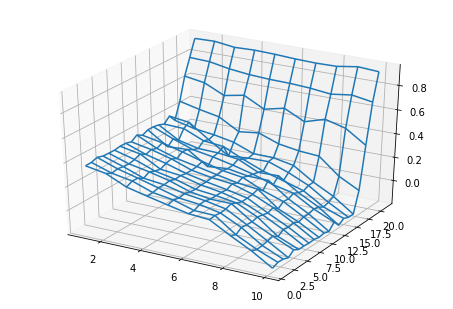

In [76]:
fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(1, 11).tolist()
Y = np.arange(1, 22).tolist()
X, Y = np.meshgrid(X, Y)
Z = np.max(q_mc, axis = 2)[X - 1,Y - 1]

ax.plot_wireframe(X, Y, Z)

plt.show()